# Análisis de ventas a través de los comportamientos del consumidor

## Motivación


El conjunto de datos es una muestra de transacciones realizadas en una tienda. Nos gustaría conocer mejor el comportamiento de compra del cliente frente a diferentes productos. Un primer problema es, entonces, predecir el monto de la compra de un usuario con la ayuda de la información contenida en las otras variables.


El problema de clasificación también se puede resolver en este conjunto de datos, ya que varias variables son categóricas y algunos otros enfoques podrían ser por ejemplo “Predecir la edad del consumidor” o incluso “Predecir la categoría de los bienes comprados”.


Este conjunto de datos también es particularmente conveniente para agrupar y quizás encontrar diferentes grupos de consumidores dentro de él como así también ser capaces de generar recomendaciones de productos.

## Breve exploración del dataset

El dataset *retail_sales.zip* se encuentra en el siguiente classroom: https://classroom.google.com/u/0/c/MzE2MDE2MTY4NzBa descargarlo y descomprimirlo.

In [1]:
import pandas as pd
import seaborn
import matplotlib as plt
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff

### Cargamos el dataset

In [2]:
retail_sales = pd.read_csv('retail_sales.csv')

In [3]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 49.2+ MB


In [4]:
retail_sales.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
109628,1004879,P00319142,M,26-35,3,A,2,0,5,14.0,NaN,36.66
535788,1004470,P00045342,M,36-45,12,C,3,1,1,5.0,17.0,155.95
499939,1004980,P00318742,M,26-35,1,B,0,0,1,8.0,NaN,154.39
262623,1004422,P00271142,M,26-35,5,A,1,1,5,NaN,NaN,71.67
480352,1001941,P00152542,M,36-45,17,A,1,0,16,NaN,NaN,125.70


### Descripción de las columnas:

- $\textit{User_ID}$: identificador unívoco de cada usuario.
- $\textit{Product_ID}$: identificador unívoco de cada producto.
- $\textit{Gender}$: género del usuario, F $\rightarrow$ Femenino, M $\rightarrow$ Masculino.
- $\textit{Age}$: edad del usuario representada por rangos, es decir, no se conoce la edad exacta del usuario sino el rango de edad al cual pertenece.
- $\textit{Occupation}$: ocupación del usuario, existen 21 ocupaciones distintas, cada una de ellas está identificada con un número del 0 al 20.
- $\textit{City_Category}$: categoría de ciudad en la que vive el usuario, existen 3 categorías: A - B - C.
- $\textit{Stay_In_Current_City_Years}$: tiempo de permanecia del usuario en la ciudad actual expresada en años. Nota: el valor 0 significa que el tiempo de permanencia del usuario en esa ciudad ha sido menor a un año, no es un valor inválido.
- $\textit{Marital_Status}$: estado civil del usuario, valor 0 $\rightarrow$ Soltero, valor 1 $\rightarrow$ Casado
- $\textit{Product_Category_1}$: categoria 1 del producto.
- $\textit{Product_Category_2}$: categoria 2 del producto, probablemente sea una subcategoria de 1.
- $\textit{Product_Category_3}$: categoria 3 del producto, probablemente sea una subcategoria de 2.
- $\textit{Purchase}$: precio que el usuario pagó por el producto expresado en dólares.

**En Primer lugar se extraen las columnas *Product_Category_2* y *Product_Category_3***

In [5]:
dataset = retail_sales.drop(['Product_Category_2', 'Product_Category_3'], axis=1)

In [6]:
dataset.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
124088,1001164,P00267942,F,26-35,19,A,1,1,8,39.20
228617,1005250,P00252042,M,51-55,6,B,4+,1,5,52.67
290439,1002793,P00145642,M,36-45,7,B,3,0,1,157.34
290092,1002745,P00257542,F,36-45,1,C,1,0,5,86.79
151951,1005490,P00255842,M,46-50,17,C,3,0,16,166.61


In [7]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,93.338599
std,1.714393e+03,6.52412,0.491612,3.750701,49.810221
min,1.000001e+06,0.00000,0.000000,1.000000,1.850000
25%,1.001495e+06,2.00000,0.000000,1.000000,58.660000
50%,1.003031e+06,7.00000,0.000000,5.000000,80.620000
75%,1.004417e+06,14.00000,1.000000,8.000000,120.730000
max,1.006040e+06,20.00000,1.000000,18.000000,239.610000


**1. Cantidad total de órdenes, usuarios y productos.**

In [8]:
cantidad = ['User_ID', 'Product_ID']

In [9]:
print('El número total de órdenes asciende a 537577')
cant = pd.DataFrame(dataset[cantidad].nunique())
cant

El número total de órdenes asciende a 537577


,0
User_ID,5891
Product_ID,3623


**2. Calcular estadísticos: media, mediana, moda, desviación estándar, valor mínimo, valor máximo de la cantidad de compras por usuario. Gráficar. A qué distribución conocida corresponde? Qué se puede concluir?**

In [10]:
user_purch = pd.DataFrame(dataset.groupby('User_ID').size())
user_purch.describe()

,0
count,5891.000000
mean,91.253947
std,105.929800
min,5.000000
25%,25.000000
50%,53.000000
75%,114.000000
max,1025.000000


In [11]:
print('La mediana de compra por cada usuario se ubicó en ', user_purch.median(), '\n', 'y la moda de las compras por usuario fue igual a ', user_purch.mode())

La mediana de compra por cada usuario se ubicó en  0    53.0
dtype: float64 
 y la moda de las compras por usuario fue igual a      0
0  17


(0, 1116.6209571460904)

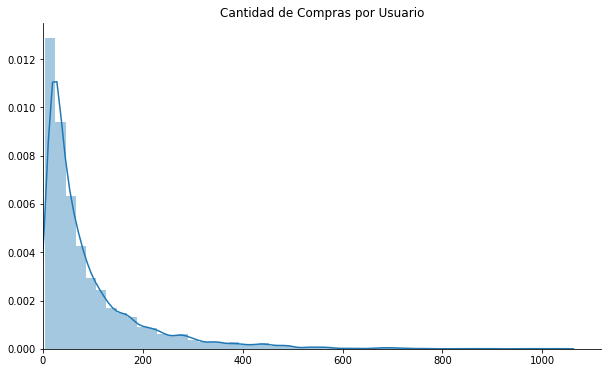

In [13]:
plt.pyplot.figure(figsize=(10,6))
seaborn.distplot(user_purch)
seaborn.despine()
plt.pyplot.title("Cantidad de Compras por Usuario")
plt.pyplot.xlim(0,None)

La cantidad de compras por usuario es marcadamente asimétrica derecha, lo que es señal de que esta variable sigue una distribución exponencial. Esto significa que el comportamiento más repetido (la moda) es una pequeña cantidad de compras (17), y que las compras de mayores cantidades son cada vez más extrañas entre los usuarios. Se puede observar además en base a la mediana, que la mitad de los usuarios compró como máximo 53 veces, aunque el promedio de compras sea de 91.25. Este último valor es afectado por la clara asimetría de la distribución, por lo que no es una buena medida representativa de los datos.

Text(0.5, 1.0, 'ViolinPlot - Cantidad de Compras por Usuario')

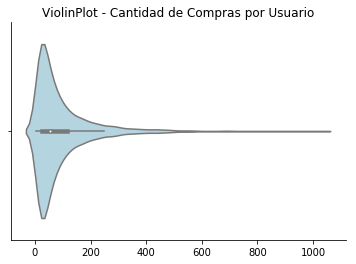

In [14]:

seaborn.violinplot(user_purch, color='lightblue', orient='h')
seaborn.despine()
plt.pyplot.title("ViolinPlot - Cantidad de Compras por Usuario")


El resultado obtenido en el ViolinPlot coincide con la gráfica observada previamente: valores concentrados en números altos de la serie, lo que responde a la asimetría de los datos. En estos casos, tanto el ViolinPlot como el BoxPlot no resultan de utilidad para la detección de **valores atípicos** 

**3. Calcular media, mediana, desviación estándar, valor mínimo, valor máximo de los valores de compras. Determinar valores atípicos (outliers) y graficar. El porcentaje de valores atípicos es muy alto? Analizar por género, edad, ocupación de los consumidores.**

In [15]:
purchase = pd.DataFrame(dataset['Purchase'])
purchase.describe()

,Purchase
count,537577.000000
mean,93.338599
std,49.810221
min,1.850000
25%,58.660000
50%,80.620000
75%,120.730000
max,239.610000


In [16]:
print('La mediana de cada compra se ubicó en ', purchase.median(), '\n', 'y la moda de las compras fue igual a ', purchase.mode())

La mediana de cada compra se ubicó en  Purchase    80.62
dtype: float64 
 y la moda de las compras fue igual a     Purchase
0     68.55


(0, 262.98460164028415)

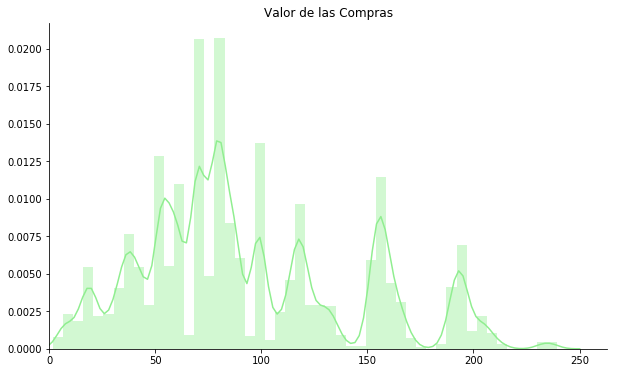

In [17]:
plt.pyplot.figure(figsize=(10,6))
seaborn.distplot(purchase, color='lightgreen')
seaborn.despine()
plt.pyplot.title("Valor de las Compras")
plt.pyplot.xlim(0,None)

Como se ve en el gráfico, los datos no siguen una distribución normal en todo su rango. Probablemente entre el rango 0-150 podría asimilarse a una función normal, pero viendo la serie en su totalidad, esta presenta una asimetría derecha, dado que en el extremo derecho de la serie aún persiste una frecuencia elevada de montos comprados.

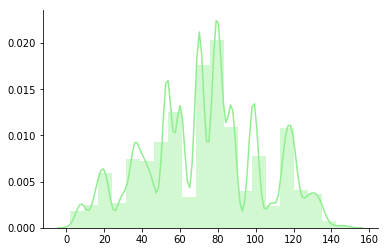

In [19]:
seaborn.distplot(purchase[purchase < 150],bins=20, color='lightgreen')
seaborn.despine()

Text(0.5, 1.0, 'ViolinPlot - Cantidad de Compras por Usuario')

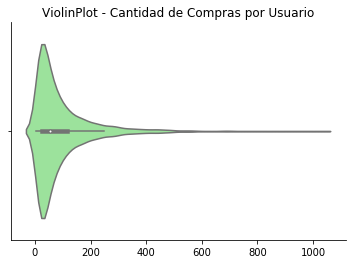

In [20]:
seaborn.violinplot(user_purch, color='lightgreen', orient='h')
seaborn.despine()
plt.pyplot.title("ViolinPlot - Cantidad de Compras por Usuario")

*Identificación de los valores atípicos*

In [21]:
q1=np.percentile(purchase,25)

In [22]:
q3=np.percentile(purchase,75)
q3

120.73

In [52]:
iqr=q3-q1
iqr

62.07000000000001

In [53]:
q4 = q3+iqr*1.5
q4

213.83500000000004

In [25]:
print( "Cantidad de valores mayores al limite superior :",len(dataset[dataset['Purchase'] > q4]))

Cantidad de valores mayores al limite superior : 2665


In [26]:
print( "Proporción de valores mayores al limite superior :", len(dataset[dataset['Purchase'] > q4])/len(dataset['Purchase']))

Proporción de valores mayores al limite superior : 0.004957429354306453


In [27]:
purch_out = dataset[dataset['Purchase'] > q4]

**Outliers por Género**

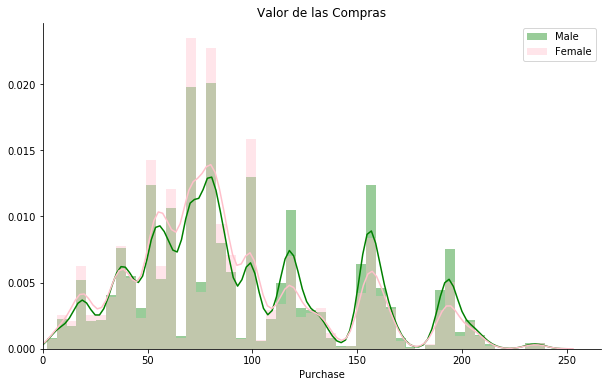

In [28]:
plt.pyplot.figure(figsize=(10,6))
seaborn.distplot(
    dataset[dataset['Gender'] == 'M']['Purchase'], 
                label='Male', color='green')
seaborn.distplot(
    dataset[dataset['Gender'] == 'F']['Purchase'], 
                label='Female', color='pink')
seaborn.despine()
plt.pyplot.title("Valor de las Compras")
plt.pyplot.xlim(0,None)
plt.pyplot.legend()

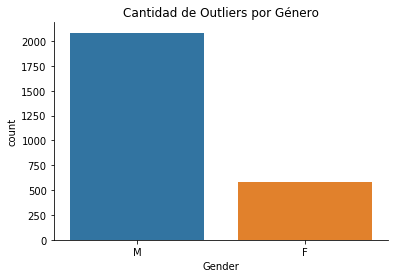

In [29]:
seaborn.countplot(x='Gender', data=purch_out)
plt.pyplot.title("Cantidad de Outliers por Género")
seaborn.despine()

**Outliers por Edad**

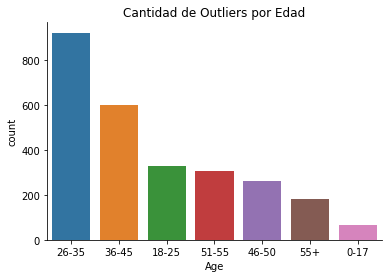

In [30]:
seaborn.countplot(x='Age', data=purch_out, order = purch_out['Age'].value_counts().index)
plt.pyplot.title("Cantidad de Outliers por Edad")
seaborn.despine()

**Outliers por Ocupación**

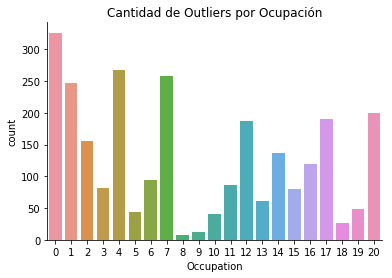

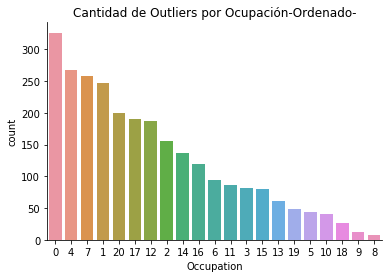

In [31]:
plt.pyplot.figure(figsize=(6,4))
seaborn.countplot(x='Occupation', data=purch_out)
plt.pyplot.title("Cantidad de Outliers por Ocupación")
seaborn.despine()

plt.pyplot.figure(figsize=(6,4))
seaborn.countplot(x='Occupation', data=purch_out, order = purch_out['Occupation'].value_counts().index)
plt.pyplot.title("Cantidad de Outliers por Ocupación-Ordenado-")
seaborn.despine()

**4. Top productos más vendidos, a qué categorias pertenecen? (tener en cuenta solo la columna Product_Category_1 ). Estos productos son consumidos por usuarios de todas las edades o algunos rangos en particular? Graficar productos más vendidos por edad y por género**

In [32]:
prod_sold = pd.DataFrame(dataset.groupby('Product_ID').size())
top_10 = prod_sold.sort_values(0, ascending=False)[0:10]

In [33]:
top_10

,0
Product_ID,
P00265242,1858
P00110742,1591
P00025442,1586
P00112142,1539
P00057642,1430
P00184942,1424
P00046742,1417
P00058042,1396
P00145042,1384


In [34]:
most_sell = ['P00265242', 'P00110742', 'P00025442', 'P00112142', 'P00057642', 'P00184942', 'P00046742', 'P00058042', 'P00145042','P00059442']

In [35]:
top10 = pd.DataFrame(dataset, columns=["Product_ID","Age","Gender"])

In [36]:
top10=top10[top10['Product_ID'].isin(most_sell)]

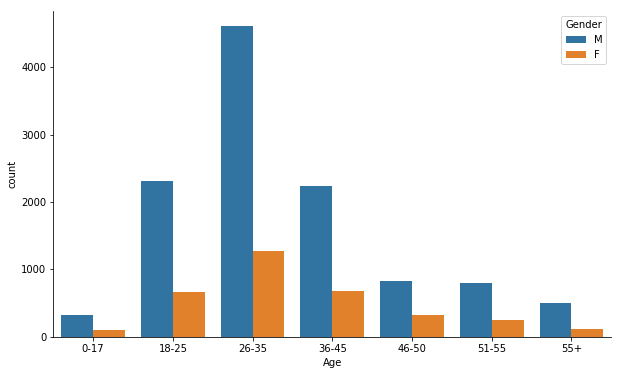

In [37]:
plt.pyplot.figure(figsize=(10,6)) 
order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
seaborn.countplot(data=top10, x='Age', 
                  hue='Gender', order=order) 
seaborn.despine()

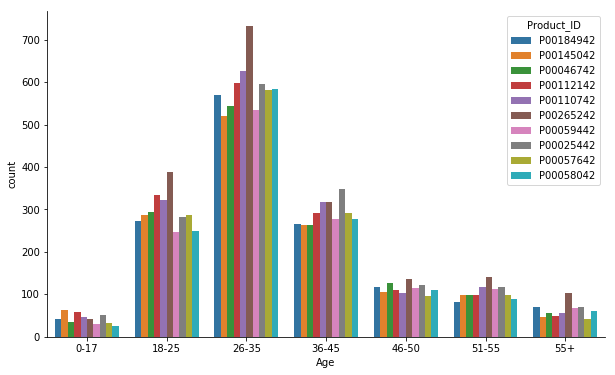

In [38]:
plt.pyplot.figure(figsize=(10,6)) 
order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
seaborn.countplot(data=top10, x='Age', 
                  hue='Product_ID', order=order) 
seaborn.despine()

El Producto PO0265242 es el más consumido entre todos los rangos etarios, a excepción de 2 rangos: 0-17 y 36-45. En el primer caso, el producto más consumido consiste en el producto PO0145042, que por lidera el ránking de productos consumidos entre las edades 0-17 años. En el segundo caso, el producto más adquirido entre las personas que tienen 36-45 años es el bien PO0025442. 

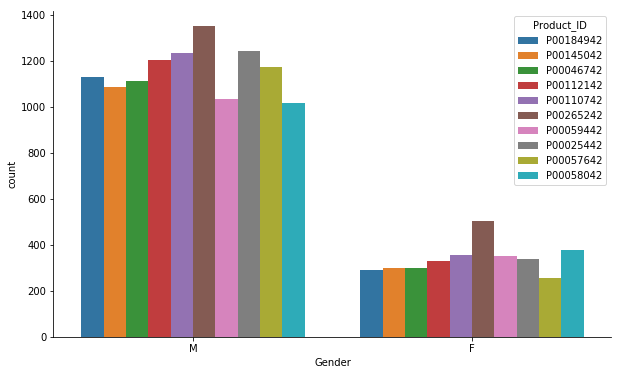

In [39]:
plt.pyplot.figure(figsize=(10,6)) 
seaborn.countplot(data=top10, x='Gender', 
                  hue='Product_ID') 
seaborn.despine()

Al analizar los productos más vendididos, distinguiendo el género, se observa que coincide tanto para hombre como para mujeres que el producto más adquirido es el PO0265242. Seguidamente, se observa que el producto que se posiciona en segundo lugar en el género femenino, es el menos adquirido por los masculinos; PO0058042.

In [40]:
top10=pd.pivot_table(top10, index='Product_ID', columns='Age', aggfunc='count')
top10

Gender                                   
Age          0-17 18-25 26-35 36-45 46-50 51-55  55+
Product_ID                                          
P00025442      52   282   595   348   122   117   70
P00046742      36   293   544   264   126    98   56
P00057642      33   288   581   291    96    99   42
P00058042      26   250   584   277   111    88   60
P00059442      30   247   535   277   115   112   68
P00110742      46   323   627   317   104   117   57
P00112142      58   335   597   292   111    98   48
P00145042      63   286   520   264   106    99   46
P00184942      43   274   570   266   118    83   70
P00265242      41   388   732   317   136   140  104

**5. La categoría de productos menos vendidos corresponde a productos muy costosos? Cuáles categorías de productos son más consumidas por edad? y por género?**

In [41]:
prod_less_sold = pd.DataFrame(dataset.groupby('Product_ID').size())
bottom_10 = prod_sold.sort_values(0, ascending=True)[0:141]

In [42]:
print('Los productos menos vendidos son los siguientes: ')
bottom_10[:5]

Los productos menos vendidos son los siguientes: 


,0
Product_ID,
P00056542,1
P00013442,1
P00013542,1
P00013842,1
P00206542,1


In [43]:
less_sell = bottom_10.index
less_sell

Index(['P00056542', 'P00013442', 'P00013542', 'P00013842', 'P00206542',
       'P00062442', 'P00062342', 'P00275042', 'P00314742', 'P00142542',
       ...
       'P00204042', 'P00260742', 'P00308042', 'P00135942', 'P00306542',
       'P00073342', 'P00126742', 'P00306942', 'P00338242', 'P00203942'],
      dtype='object', name='Product_ID', length=141)

In [44]:
bottom10 = pd.DataFrame(dataset, columns=["Product_ID","Age","Gender",'Purchase'])

In [45]:
bottom10=bottom10[bottom10['Product_ID'].isin(less_sell)]

In [72]:
bottom10.sort_values(by='Purchase', ascending=False)[0:10]

,Product_ID,Age,Gender,Purchase
173592,P00074542,26-35,M,203.23
424219,P00341542,55+,M,202.91
137562,P00308042,51-55,F,192.06
514546,P00315142,26-35,M,184.68
511641,P00075042,36-45,M,184.56
97045,P00135942,26-35,M,169.54
518979,P00038842,51-55,F,168.95
402677,P00292142,36-45,F,166.09
528719,P00295642,26-35,M,159.66
303737,P00166442,36-45,M,159.66


Inicialmente consideramos los productos que presentan un valor superior al 75% de los valores en la muestra

In [73]:
bottom10_exp = bottom10[bottom10['Purchase'] > q3]
print('Del total de productos menos consumidos, solo ', len(bottom10_exp), 'se encuentran fuera del 75% de las obervaciones')

Del total de productos menos consumidos, solo  17 se encuentran fuera del 75% de las obervaciones


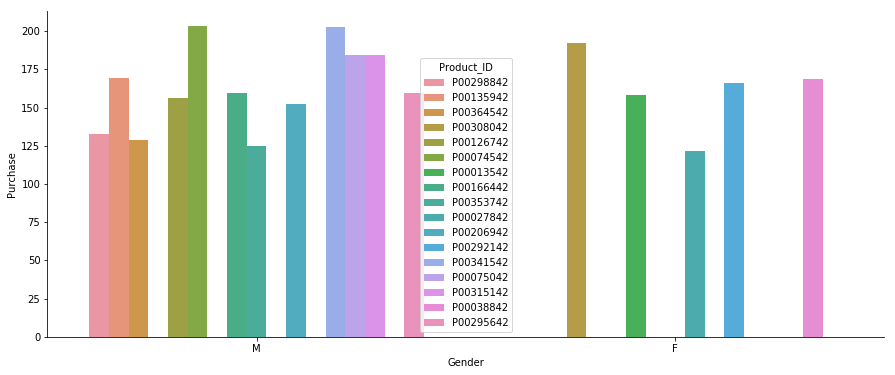

In [74]:
plt.pyplot.figure(figsize=(15,6))
seaborn.barplot(x='Gender', y='Purchase', data=bottom10_exp,
               hue='Product_ID')
seaborn.despine()

5 de los productos menos vendidos fueron adquiridos por mujeres, mientras que los 12 productos restantes fueron adquiridos por hombres.

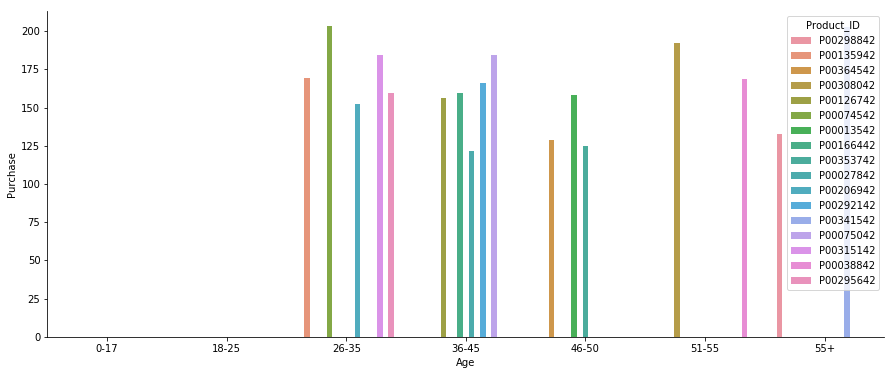

In [75]:
plt.pyplot.figure(figsize=(15,6))
seaborn.barplot(x='Age', y='Purchase', data=bottom10_exp,
               hue='Product_ID', order=order)
seaborn.despine()

A continuación, se analiza el caso de los productos que se encuentran por debajo del 25% de las observaciones.

In [76]:
bottom10_chp = bottom10[bottom10['Purchase'] < q1]
print('Del total de productos menos consumidos, solo ', len(bottom10_chp), 'se encuentran fuera del 25% inferior de las obervaciones')

Del total de productos menos consumidos, solo  67 se encuentran fuera del 25% inferior de las obervaciones


In [84]:
bot = len(bottom10_chp+bottom10_exp)/len(bottom10)
bot

0.5957446808510638

El 60% de los productos menos consumidos se encuentra por fuera de los rangos intercuartílicos.

**6. Los usuarios que más compran (usuarios con más de 200 órdenes) poseen características en común? Cuáles?**

In [ ]:
prod_less_sold = pd.DataFrame(dataset.groupby('Product_ID').size())
bottom_10 = prod_sold.sort_values(0, ascending=True)[0:10]

**7. Analizar la distribución de ventas por edad, género y estado civil. Graficar.**

In [262]:
dataset_1 = ['Age', 'Gender', 'Marital_Status', 'Purchase']
dataset_2 = pd.DataFrame(dataset[dataset_1])

*Distribución de las ventas por edad*

In [280]:
dataset_age = dataset_2[['Age', 'Gender', 'Purchase']]

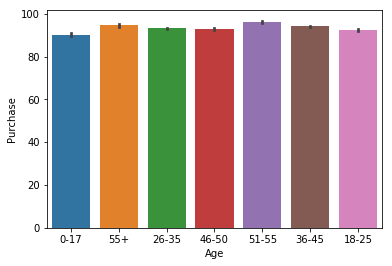

In [279]:
seaborn.barplot(x='Age',y='Purchase', data=dataset_2)

**8. Qué categoría de ciudad posee el mayor porcentaje de compras dada la proporción de usuarios que contiene? Graficar.**

In [282]:
dataset_2_1 = pd.DataFrame(dataset, columns=['City_Category', 'User_ID', 'Purchase'])
dataset_2_1 = pd.pivot_table(dataset_2_1, )

**9. Analizar la correlación entre edad y ocupación de los consumidores**